In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler,Normalizer, RobustScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/coding/Kaggle/train.csv")

In [ ]:
data.info()

In [ ]:
data.isnull().sum().sort_values(ascending=False)/data.shape[0]

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

In [ ]:
data=data.drop(['PoolQC', 'Alley','MiscFeature','Fence', 'Id',  'BsmtExposure','FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageFinish', 'GarageType', 'GarageCond','LowQualFinSF' ], axis = 1)

In [ ]:
data_num_columns =data.select_dtypes(include="number").copy().columns

In [ ]:
display(data.describe())
data.describe(include=['O']).T # O to describe objects/categories

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445


In [ ]:
data["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [ ]:
#List all data types of all the columns
#data.dtypes.sort_values(ascending=True)

In [ ]:
X= data
y = data.pop("SalePrice")

In [ ]:

corrMatrix = X.corr().abs()
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.50
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [ ]:
X = X.drop(columns=to_drop)



In [ ]:
#Correlation map 
#fig, ax = plt.subplots(figsize=(22,18))
#sns.heatmap(X.corr(), annot=True, ax=ax)
#plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
scaler = StandardScaler()
# select categorical and numerical column names

data_cat_columns =X.select_dtypes(exclude="number").copy().columns#[1:]
data_num_columns =X.select_dtypes(include="number").copy().columns
#data_ord_coloumns = X.select_dtypes(exclude="number").copy().MSZoning



# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(SimpleImputer(strategy="mean"), scaler )
                          
    
 
# create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder( handle_unknown = 'ignore') 
    
           # using one hot encoder to convert categorical values in numeric value
)

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, data_num_columns),
        ("cat_pipe", categoric_pipe, data_cat_columns)
        
        
    ]
)

# Creating baseline models for different regressors

# For Linear Regression

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
full_pipeline_lr = make_pipeline(preprocessor, SelectKBest(score_func=f_regression, k=129), LinearRegression())
full_pipeline_lr.fit(X_train, y_train)
y_pred_test_lr = full_pipeline_lr.predict(X_test)
r2_score(y_test, y_pred_test_lr), mean_absolute_error(y_test, y_pred_test_lr), np.sqrt(mean_squared_error(y_test, y_pred_test_lr))

(0.9076278087007976, 17522.65451578324, 24516.986897408635)

# Using XGBRegressor

In [ ]:

from xgboost import XGBRegressor
full_pipeline_xr = make_pipeline(preprocessor, SelectKBest(score_func=f_regression, k=127), XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4))
full_pipeline_xr.fit(X_train, y_train)
y_pred_test_xr = full_pipeline_xr.predict(X_test)
r2_score(y_test, y_pred_test_xr), mean_absolute_error(y_test, y_pred_test_xr), np.sqrt(mean_squared_error(y_test, y_pred_test_xr))


[08:22:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.9255684624253988, 14106.786440496575, 22007.71569838362)

In [ ]:
results = pd.DataFrame({
    'predictions':full_pipeline_xr.predict(X_test),
    'true_values':y_test
})
results

,predictions,true_values
930,231063.140625,201000
530,187016.437500,175000
1291,109765.523438,119500
1385,117977.421875,125500
305,326328.250000,305900
...,...,...
453,224844.109375,210000
678,293388.875000,372500
190,298192.875000,315000
748,233681.187500,260400


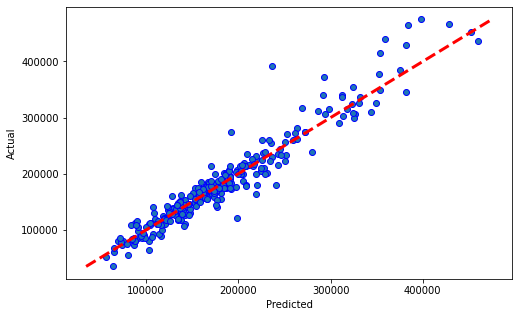

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(y_pred_test_xr, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
# loading test csv
test_data = pd.read_csv("/content/drive/MyDrive/coding/Kaggle/test.csv")

In [ ]:
test = full_pipeline_xr.predict(test_data)
test 

array([119090.92, 160921.23, 183924.75, ..., 167488.38, 124164.42,
       237938.2 ], dtype=float32)

In [ ]:
test_data["SalePrice"] = test

In [ ]:
test_data["SalePrice"]

0       119090.921875
1       160921.234375
2       183924.750000
3       185957.562500
4       179990.984375
            ...      
1454     80128.085938
1455     82959.281250
1456    167488.375000
1457    124164.421875
1458    237938.203125
Name: SalePrice, Length: 1459, dtype: float32

In [ ]:
Submission = test_data[["Id","SalePrice"]]

In [ ]:
Submission.to_csv("results.csv", index = False)

In [ ]:
from google.colab import files
files.download('results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
full_pipeline_dt = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=1))
full_pipeline_dt.fit(X_train, y_train)
y_pred_test_dt = full_pipeline_dt.predict(X_test)
r2_score(y_test, y_pred_test_dt), mean_absolute_error(y_test, y_pred_test_dt), np.sqrt(mean_squared_error(y_test, y_pred_test_dt))


(0.7602300958021857, 25476.30821917808, 39499.700864828825)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
full_pipeline_rf = make_pipeline(preprocessor, RandomForestRegressor(max_depth=2, random_state=0))
full_pipeline_rf.fit(X_train, y_train)
y_pred_test_rf = full_pipeline_rf.predict(X_test)
r2_score(y_test, y_pred_test_rf), mean_absolute_error(y_test, y_pred_test_rf), np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

(0.6992356057083009, 33011.18331462859, 44239.44628053092)

In [ ]:
sc={'Name':['Linear', 'DecisionTrees', 'RandomForest'], 'MAE':[ 16681.518103011313, 24770.654109589042, 32847.12227973865], 'RMSE':[24225.31621816242, 35935.35588219681,43980.53268819861], 'R2_score':[0.909812579464663, 0.8015500669188811, 0.7027457814190909]}
pd.DataFrame(sc)

,Name,MAE,RMSE,R2_score
0,Linear,16681.518103,24225.316218,0.909813
1,DecisionTrees,24770.654110,35935.355882,0.801550
2,RandomForest,32847.122280,43980.532688,0.702746


# PCA 

In [ ]:

X_prep = preprocessor.fit_transform(X_train)
X_prep_df = pd.DataFrame(X_prep.toarray())

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10) # pick number of components 
X_reduced = pca.fit_transform(preprocessor.toarray())

AttributeError: ignored

# Feature Engineering